## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [4]:
pwd

'C:\\Users\\owner'

In [5]:
%cd downloads

C:\Users\owner\downloads


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### 1) Determine if the survival rate is associated to the class of passenger.


In [10]:
survival_freq = pd.crosstab(titanic['Pclass'], titanic['Survived'])
survival_freq

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


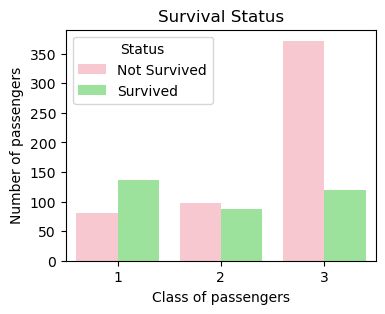

In [20]:

plt.figure(figsize=(4, 3))
sns.countplot(data=titanic, x='Pclass', hue='Survived', palette=['pink','lightgreen'])
plt.title('Survival Status')
plt.xlabel('Class of passengers')
plt.ylabel('Number of passengers')
plt.legend(title='Status', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()

In [26]:
chi2, p, _, _ = chi2_contingency(survival_freq)
p

4.549251711298793e-23

Ans- Both Survival Rate and Class of passengers are categorical variables. For two categorical variables, we perform chi-square analysis to check the association between variables. After performing the analysis, we find that p_value is smaller than 0.05 (p<0.05). Therefore, there is a significant association between survival rate and class of passengers.

#### 2. Determine if the survival rate is associated to the gender

In [17]:
gender_survival_freq = pd.crosstab(titanic['Sex'], titanic['Survived'])
gender_survival_freq

Survived,0,1
Sex,,
female,81,233
male,468,109


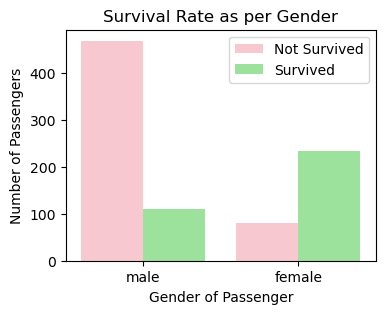

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(data=titanic, x='Sex', hue='Survived', palette=['pink','lightgreen'])
plt.title('Survival Rate as per Gender')
plt.xlabel('Gender of Passenger')
plt.ylabel('Number of Passengers')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

In [25]:
chi2, p, _, _ = chi2_contingency(gender_survival_freq)
p

1.1973570627755645e-58

Ans- Since, both Survival Rate and Gender are categorical variables, we perform chi-square analysis to check the association between them. The result of analysis show that p_value is is smaller than 0.05 (p<0.05). Therefore, there is a significant association between survival rate and class of passengers. 

#### 3. Determine the survival rate is associated to the age

In [47]:
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=[0,13,18,60,100], labels=['Children','Teenage', 'Adults', 'Seniors'])
age_freq = pd.crosstab(titanic['AgeGroup'], titanic['Survived'])
age_freq

Survived,0,1
AgeGroup,,
Children,29,42
Teenage,40,28
Adults,338,215
Seniors,17,5


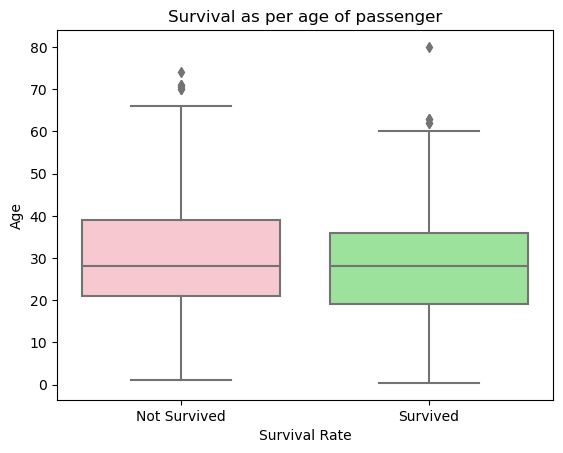

In [37]:
sns.boxplot(x='Survived', y='Age', data=titanic, palette=['pink','lightgreen'])
plt.title('Survival as per age of passenger')
plt.xlabel("Survival Rate")
plt.ylabel("Age")
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

In [48]:
age_survival_freq=pd.crosstab(titanic['AgeGroup'], titanic['Survived'])
chi2, p, _, _ = chi2_contingency(age_survival_freq)
p

0.0032861985278115676

Ans- Since, both Survival Rate and Gender are categorical variables, we perform chi-square analysis to check the association between them. The result of analysis show that p_value is is smaller than 0.05 (p<0.05). Therefore, there is a significant association between survival rate and class of passengers. 

In [ ]:
Link to GitHub- 